# Feature Engineering 3: Missing Values

#### Exercise:

* Run the code
* Explain what the 3 Feature Engineering methods below do

In [2]:
import seaborn as sns
import pandas as pd

In [3]:
df = sns.load_dataset('titanic')  # passenger list of the Titanic
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


<AxesSubplot:>

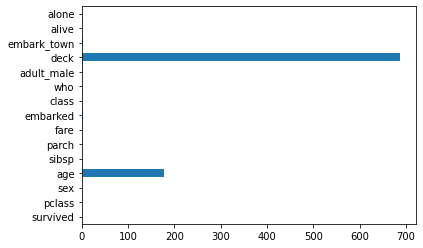

In [6]:
# useful one-liner to count missing values
df.isna().sum().plot.barh()

#### Technique 1: imputation with fixed value

In [25]:
age = df[['age']]
df['age_median'] = age.fillna(age.median())
df[['age', 'age_median']].head(7)

,age,age_median
0,22.0,22.0
1,38.0,38.0
2,26.0,26.0
3,35.0,35.0
4,35.0,35.0
5,NaN,28.0
6,54.0,54.0


#### Technique 2: Preserve missing info

In [29]:
df['age'].isna().head(7)

0    False
1    False
2    False
3    False
4    False
5     True
6    False
Name: age, dtype: bool

In [30]:
df['age_missing'] = df['age'].isna().astype(int)
df[['age', 'age_median', 'age_missing']].head(7)

,age,age_median,age_missing
0,22.0,22.0,0
1,38.0,38.0,0
2,26.0,26.0,0
3,35.0,35.0,0
4,35.0,35.0,0
5,NaN,28.0,1
6,54.0,54.0,0


#### Technique 3: Group Replacement

In [16]:
# step 1: calculate group means first
groups = df.groupby('class')['age'].mean()
groups

class
First     38.233441
Second    29.877630
Third     25.140620
Name: age, dtype: float64

In [20]:
# step 2: create pseudo-column
temp = df['class'].replace(groups)
temp.head()

0    25.140620
1    38.233441
2    25.140620
3    38.233441
4    25.140620
Name: class, dtype: float64

In [31]:
# step 3: insert
df['age_groups'] = df['age'].fillna(temp)
df[['age', 'age_median', 'age_missing', 'age_groups']].head(7)

,age,age_median,age_missing,age_groups
0,22.0,22.0,0,22.00000
1,38.0,38.0,0,38.00000
2,26.0,26.0,0,26.00000
3,35.0,35.0,0,35.00000
4,35.0,35.0,0,35.00000
5,NaN,28.0,1,25.14062
6,54.0,54.0,0,54.00000


In [27]:
# for more complex groupings, create a temporary category first:
df['class/sex'] = df['class'].astype(str) + '_' + df['sex']
df['class/sex'].head()

# next steps 1-3

0      Third_male
1    First_female
2    Third_female
3    First_female
4      Third_male
Name: class/sex, dtype: object

#### Technique 4: Subsampling

In [47]:
N = df.shape[0]
sample = df['age'].dropna().sample(N, replace=True)
sample.head()

791    16.0
230    35.0
494    21.0
627    21.0
722    34.0
Name: age, dtype: float64

In [49]:
sample = pd.Series(sample.values, index=df.index)  # we have to replace the index column, otherwise values don't fit!
sample.head()

0    16.0
1    35.0
2    21.0
3    21.0
4    34.0
dtype: float64

In [50]:
df['age_sampled'] = df['age'].fillna(sample)

#### Bonus: check the histograms

<AxesSubplot:ylabel='Count'>

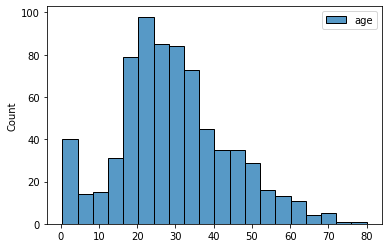

In [37]:
import seaborn as sns

sns.histplot(df[['age']], bins=20)

<AxesSubplot:ylabel='Count'>

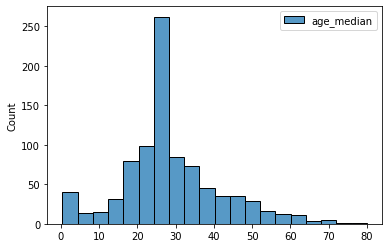

In [38]:
sns.histplot(df[['age_median']], bins=20)

<AxesSubplot:ylabel='Count'>

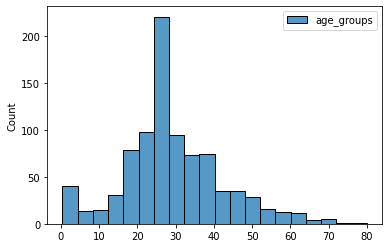

In [39]:
sns.histplot(df[['age_groups']], bins=20)

<AxesSubplot:ylabel='Count'>

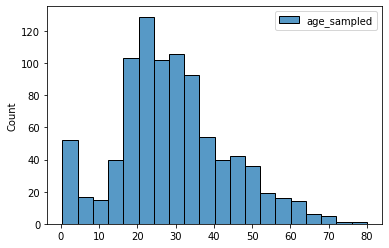

In [52]:
sns.histplot(df[['age_sampled']], bins=20)